<a href="https://colab.research.google.com/github/ParkStrat/StellarClassification/blob/main/StellarClassification_(Part_II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Tools and Dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Cleaning Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37553 entries, 0 to 37552
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       37553 non-null  float64
 1   alpha        37553 non-null  float64
 2   delta        37553 non-null  float64
 3   u            37553 non-null  float64
 4   g            37553 non-null  float64
 5   r            37553 non-null  float64
 6   i            37553 non-null  float64
 7   z            37553 non-null  float64
 8   run_ID       37553 non-null  int64  
 9   rerun_ID     37553 non-null  int64  
 10  cam_col      37553 non-null  int64  
 11  field_ID     37553 non-null  int64  
 12  spec_obj_ID  37552 non-null  float64
 13  class        37552 non-null  object 
 14  redshift     37552 non-null  float64
 15  plate        37552 non-null  float64
 16  MJD          37552 non-null  float64
 17  fiber_ID     37552 non-null  float64
dtypes: float64(13), int64(4), object(1)
memory usa

Column descriptions from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

run_ID = Run Number used to identify the specific scan

rereun_ID = Rerun Number to specify how the image was processed

cam_col = Camera column to identify the scanline within the run

field_ID = Field number to identify each field

spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

class = object class (galaxy, star or quasar object)

redshift = redshift value based on the increase in wavelength

plate = plate ID, identifies each plate in SDSS

MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

Checking for duplicates

In [4]:
df.duplicated().sum()

0

There are no duplicates and there does not seem to be any missing data

Checking target class balance

In [5]:
df['class'].value_counts(normalize = True)

GALAXY    0.580981
STAR      0.222891
QSO       0.196128
Name: class, dtype: float64

Classes are not very evenly balanced

Removing unecessary rows due to these rows each having unique entries (such as obj_id - a unique identifier that catelogs the objet) or irrelivant to classification of the target column (such as run_ID - number used to identify the scan used to capture the data about the celestial object) 

In [8]:
df.drop(columns = ['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         100000 non-null  float64
 1   g         100000 non-null  float64
 2   r         100000 non-null  float64
 3   i         100000 non-null  float64
 4   z         100000 non-null  float64
 5   class     100000 non-null  object 
 6   redshift  100000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


In [9]:
df.describe(include = 'all')

,u,g,r,i,z,class,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN
freq,NaN,NaN,NaN,NaN,NaN,59445,NaN
mean,21.980468,20.531387,19.645762,19.084854,18.668810,NaN,0.576661
std,31.769291,31.750292,1.854760,1.757895,31.728152,NaN,0.730707
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,NaN,-0.009971
25%,20.352353,18.965230,18.135828,17.732285,17.460677,NaN,0.054517
50%,22.179135,21.099835,20.125290,19.405145,19.004595,NaN,0.424173
75%,23.687440,22.123767,21.044785,20.396495,19.921120,NaN,0.704154


The min value -9999 seems like a major outlier based on the other values for each feature

---
Identifiying if the -9999 observation is a single observation  

In [10]:
df.loc[df['u'] == -9999]

,u,g,r,i,z,class,redshift
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,STAR,0.000089


Revmoing the outlier observation and checking to ensure it is removed

In [12]:
df.drop(index = 79543, inplace = True)

In [13]:
df.describe(include = 'all')

,u,g,r,i,z,class,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN
freq,NaN,NaN,NaN,NaN,NaN,59445,NaN
mean,22.080679,20.631583,19.645777,19.084865,18.768988,NaN,0.576667
std,2.251068,2.037384,1.854763,1.757900,1.765982,NaN,0.730709
min,10.996230,10.498200,9.822070,9.469903,9.612333,NaN,-0.009971
25%,20.352410,18.965240,18.135795,17.732280,17.460830,NaN,0.054522
50%,22.179140,21.099930,20.125310,19.405150,19.004600,NaN,0.424176
75%,23.687480,22.123775,21.044790,20.396510,19.921120,NaN,0.704172


Data is now ready for visualization

# Exploratory Visualization

Creating histogram plots of all the numerical features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


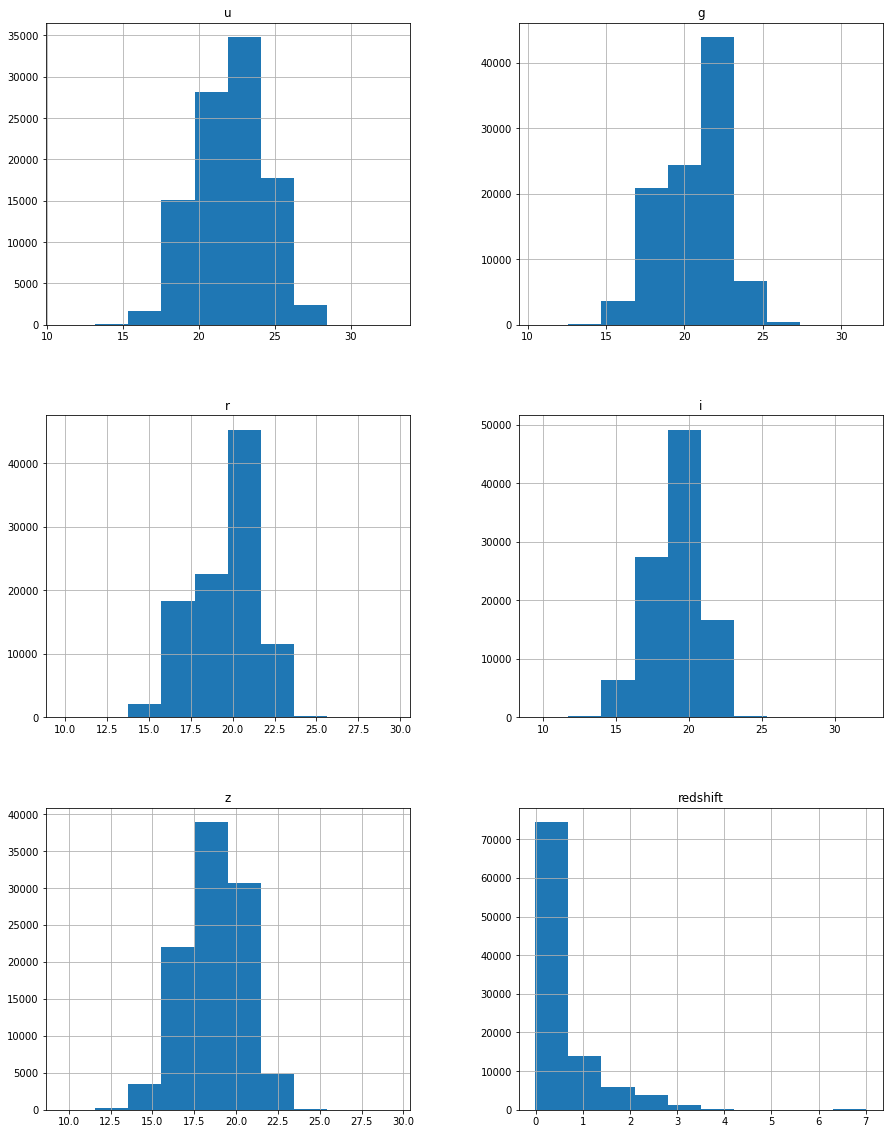

In [18]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

All the frequency of light features roughly follow a standard bell curve distribution and and nothing seems out of the ordinary

---
Creating a histogram to further understand the redshift distibution

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


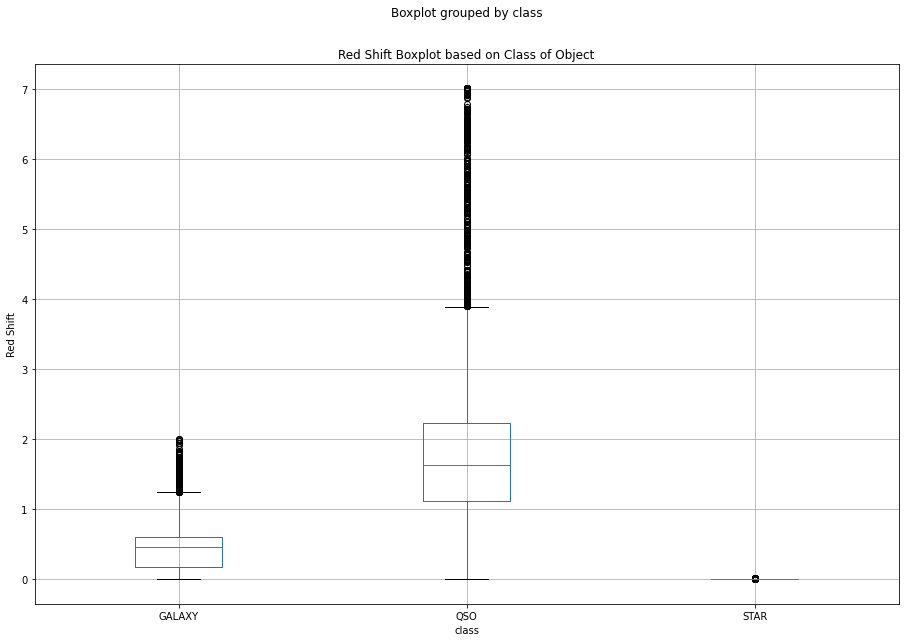

In [31]:
df.boxplot(column = 'redshift', by = 'class', figsize = (15, 10))
plt.title('Red Shift Boxplot based on Class of Object')
plt.ylabel('Red Shift');

The Red shift histogram plot indicates the a vast majotiry of observations have a low red shift while there are some outliers. The box plot further illumintes the distribution and makes sense given that red shift is an indicator of the rate of movement away from the observer and quasars and galaxies tend to have high rates of movement relative to earth than stars (majority of observable stars are in our galaxy and are generally rotating in a similar fashion to earth around the galactic center).   

Creating a histogram of the target class

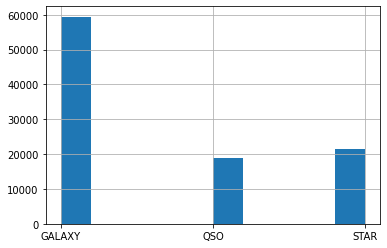

In [20]:
df['class'].hist();

As determined earlier, there is not even balance among the classes

* 58% - Galaxies
* 22% - Stars
* 20% - Quasar


Creating a heatmap to determine correlation between classes

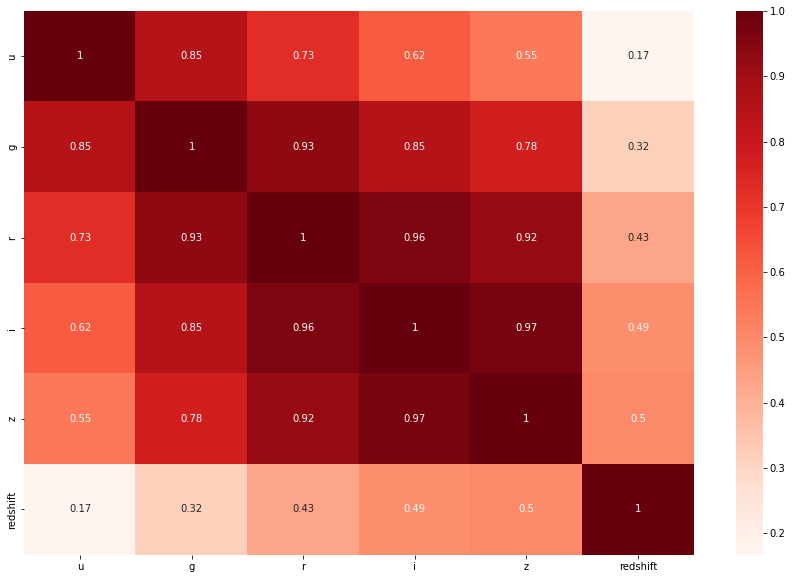

In [32]:
corr = df.corr()
plt.subplots(figsize = (15, 10))
sns.heatmap(corr, cmap = 'Reds', annot = True);

There are numerous correlations within this dataset

* Excluding redshift, the features of this dataset are adjacent frequency ranges on the EM spectrum. Thus the ranges closest together should have and, according to the heatmap, do have strong postive correlations (as high as 0.97). As the features are further away from each other on EM spectrum, their positive correlation drops (see 'u' [Ultraviolet] and 'z' [Infrared light] - 0.55)  
* Blueshift(not a feature of this dataset) and redshift are the "compression" and 'elongation' of light waves as an object moves toward and away from an observer. Redshift occuring as an object moves away from the observer which "elongates" the wave length and since red is a longer wavelength than blue, it causes a shift toward the red wavelengths. With that in mind it would make sense that red shift would have higher correlation with those wavelengths closer to red and infrared ('redshift', 'i', 'z') than green and ultraviolet ('g' and 'u') 